In [22]:
%matplotlib inline
import networkx as nx
import numpy as np
import pandas as pd
from tqdm import tqdm
from rwc import controversy_score
from joblib import Parallel, delayed
from util import build_graph_from_df

In [23]:
df = pd.read_pickle('data/july.pkl')

In [24]:
freq = df['hashtag'].value_counts()

In [25]:
tags = freq[freq > 5e3].index

In [26]:
print('#tag={}'.format(len(tags)))

#tag=93


In [27]:
rws_list = Parallel(n_jobs=7)(delayed(controversy_score)(build_graph_from_df(df[df['hashtag'] == t]))
                              for t in tags)


In [28]:
df = pd.DataFrame.from_records({'tag': tags, 'rwc': rws_list})

In [29]:
df

,rwc,tag
0,0.142367,MTVHottest
1,0.234136,VeranoMTV2016
2,0.141616,TeenChoice
3,0.115428,DemsInPhilly
4,0.113085,RNCinCLE
5,0.043329,ALDUB1stAnniversary
6,0.169079,PokemonGO
7,0.113998,BlackLivesMatter
8,0.149887,MGWV
9,0.131090,etsy


In [30]:
df.describe()

,rwc
count,93.000000
mean,0.112129
std,0.063880
min,0.005458
25%,0.065227
50%,0.104747
75%,0.157060
max,0.285589


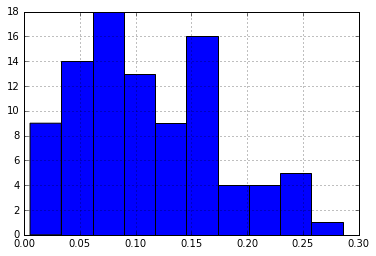

In [31]:
pd.Series(rws_list).hist()